## 🎯 Monte Carlo Simulation — How It Works and How to Use It

This notebook simulates repeated **trading or betting scenarios** using a **Monte Carlo simulation**.  
Monte Carlo simulations help traders understand **risk**, **returns**, and the **likelihood of success or failure** when randomness is involved — just like in real markets.

---

### 🧠 What the Simulation Does

The simulation models a series of trades (or bets) over time:

1. You start with a certain **initial amount of capital**.  
2. You repeatedly place trades or bets for a total of `n_bets` rounds.  
3. Each trade can **win or lose**, based on a given probability (`odds`).  
4. The program tracks how your portfolio value changes after each round.  
5. This process is repeated `n_simulations` times to measure how random outcomes affect results.

By averaging over many runs, you can estimate:

- The **average final portfolio value**  
- The **failure rate** (how often your balance runs out or hits a stop threshold)  
- The **distribution of possible outcomes**, shown in a plot of portfolio paths  

---

### ⚙️ Input Variables Explained

| Variable | Description |
|-----------|-------------|
| **`n_simulations`** | Number of separate Monte Carlo runs (e.g., 1000). More runs = smoother averages. |
| **`bet`** | Bet or trade size. In the **Nominal** model this is a fixed dollar amount; in the **Percentage** model it’s a fraction of your portfolio. |
| **`multiplier`** | How much you earn on a winning trade (a value of `1` means you double your bet). |
| **`odds`** | Probability of winning each trade (e.g., `0.51` means a 51% win rate). |
| **`initial_amount`** | Starting portfolio or bankroll value. |
| **`n_bets`** | Number of trades/bets per simulation. |
| **`plot`** | Whether to plot all portfolio paths at the end. |
| **`log`** | Whether to print summary statistics in the console. |
| **`threshold`** | (Percentage model only) Stop if balance falls below this fraction of the starting amount. |

---

### 📊 Two Types of Simulations

#### 1. **NominalMonteCarlo**
Bets a **fixed dollar amount** every round (e.g., always \$2).  
The bet size never changes — even if your portfolio grows or shrinks.  

This is useful for testing **fixed-lot strategies**, like always trading the same position size.

```python
mc = NominalMonteCarlo(
    n_simulations=1000,
    bet=2.0,              # Fixed bet size ($2 per trade)
    multiplier=1,
    odds=0.51,
    initial_amount=100,
    n_bets=300,
    plot=True,
    log=True
)
mean_final, fail_rate = mc.monte_carlo_simulation()
```

#### 2.- PercentageMonteCarlo

The **PercentageMonteCarlo** simulation bets a **percentage of your portfolio** each round (for example, 2% per trade).  
This means your bet size **automatically adjusts** as your account balance changes — growing after wins and shrinking after losses.  

This model reflects **real-world position sizing** and **risk management** practices in trading, where traders risk a consistent *percentage* of their account rather than a fixed dollar amount.

```python
mc = PercentageMonteCarlo(
    n_simulations=1000,   # Number of independent simulation runs
    bet=0.02,             # 2% of portfolio per trade
    multiplier=1,         # Multiplier for winnings
    odds=0.51,            # Probability of winning each trade
    initial_amount=100,   # Starting capital
    n_bets=100,           # Number of bets per simulation
    plot=True,            # Plot all simulation results
    log=True,             # Print summary statistics
    threshold=0.5         # Stop if balance < 50% of starting capital
)
mean_final, fail_rate = mc.monte_carlo_simulation()
```
## 🧩 How to Use the Monte Carlo Simulation

This section explains how to **run and interpret** the Monte Carlo simulation for trading strategy testing.

---

### ⚙️ Step 1 — Choose a Simulation Type
You can use one of two simulation models:
1. **NominalMonteCarlo** → bets a fixed dollar amount each round.  
2. **PercentageMonteCarlo** → bets a fixed *percentage* of your current portfolio.

For most trading use cases, the **PercentageMonteCarlo** model is preferred since it mimics position sizing in real-world trading.

---

### 🧠 Step 2 — Set Your Parameters

| Parameter | Description |
|------------|--------------|
| `n_simulations` | Number of independent simulation runs (e.g., 1000). Higher = smoother results. |
| `bet` | Size of each bet or trade. In the percentage model, this is a fraction (e.g., 0.02 = 2%). |
| `multiplier` | Multiplier on winning trades (1 means you win the same amount you risked). |
| `odds` | Probability of winning a trade (0.51 means a 51% chance to win). |
| `initial_amount` | Starting portfolio or bankroll (e.g., \$100). |
| `n_bets` | Number of bets or trades per simulation. |
| `plot` | If `True`, plots all simulated portfolio paths. |
| `log` | If `True`, prints summary statistics after the simulation. |
| `threshold` | (Optional) Stop simulation if balance drops below this fraction of starting capital. |

---

### ▶️ Step 3 — Run a Simulation

Example using the **PercentageMonteCarlo** model:

```python
mc = PercentageMonteCarlo(
    n_simulations=1000,
    bet=0.02,             # 2% of portfolio per trade
    multiplier=1,
    odds=0.51,
    initial_amount=100,
    n_bets=100,
    plot=True,
    log=True,
    threshold=0.5
)
mean_final, fail_rate = mc.monte_carlo_simulation()


In [1]:
from utils.monte_carlo_games import NominalMonteCarlo, PercentageMonteCarlo


Mean return of the strategy: 56.279999999999994%

How often we run out of money: 61.7%


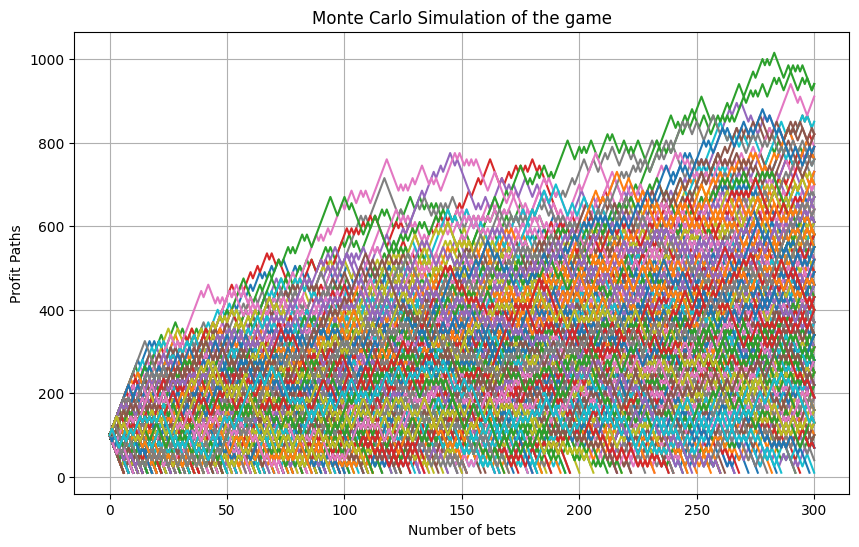

In [4]:
mc = NominalMonteCarlo(n_simulations=1000, bet=15.0, multiplier=1, odds=0.51,
                       initial_amount=100, n_bets=300, plot=True, log=True)
mean_final, fail_rate = mc.monte_carlo_simulation()



Mean return of the strategy: 9.470355744757812%

How often we run out of money: 24.8%


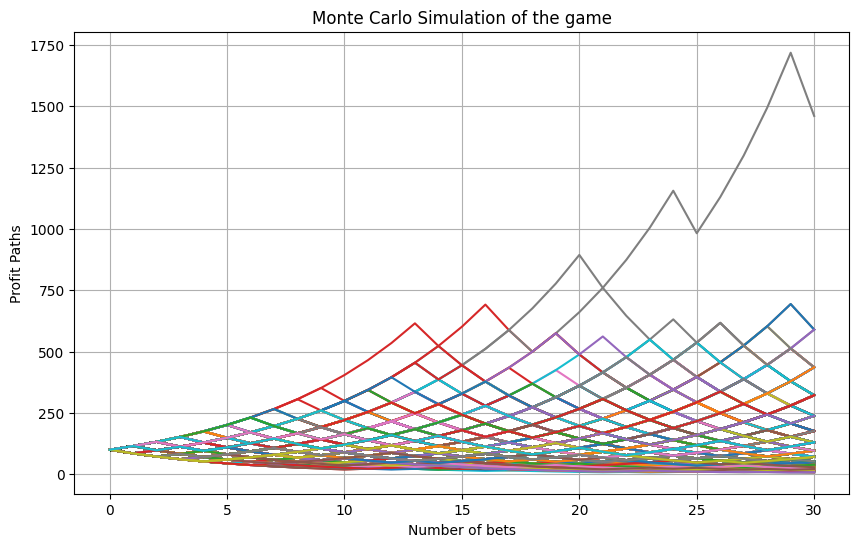

In [6]:
mc = PercentageMonteCarlo(n_simulations=1000, bet=0.15, multiplier=1, odds=0.51,
                       initial_amount=100, n_bets=30, plot=True, log=True, threshold=0.5)
mean_final, fail_rate = mc.monte_carlo_simulation()

### Question: Can you apply the Kelly crierion to optimize risk-adjusted returns?